<a href="https://colab.research.google.com/github/michaelscheinfeild/3D-Machine-Learning/blob/master/Camera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import files

https://sourishghosh.com/2016/fundamental-matrix-from-camera-matrices/


https://learnopencv.com/camera-calibration-using-opencv/

https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-for-camera-calibration-in-computer-vision/

https://towardsdatascience.com/3-d-reconstruction-with-vision-ef0f80cbb299

https://gilscvblog.com/
https://programs.wiki/wiki/feature-matching-in-opencv.html
https://www.geeksforgeeks.org/feature-matching-using-brute-force-in-opencv/

--------
reconstruction
https://ksimek.github.io/2013/08/13/intrinsic/
https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html
***********
https://towardsdatascience.com/camera-calibration-fda5beb373c3

https://towardsdatascience.com/3-d-reconstruction-with-vision-ef0f80cbb299
https://learnopencv.com/camera-calibration-using-opencv/
https://learnopencv.com/category/camera-calibration/

https://towardsdatascience.com/3-d-reconstruction-with-vision-ef0f80cbb299

https://stackoverflow.com/questions/17607312/what-is-the-difference-between-a-disparity-map-and-a-disparity-image-in-stereo-m

In [2]:
pathMain='/content/drive/MyDrive/CameraCalibration/'

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [4]:
%matplotlib inline

In [5]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

display some image

In [6]:
files = ['left01.jpg', 'left02.jpg', 'left03.jpg', 'left04.jpg','left05.jpg','left06.jpg']

In [7]:
imgboard1= cv2.imread(pathMain + files[0])
imgboard1.__class__


numpy.ndarray

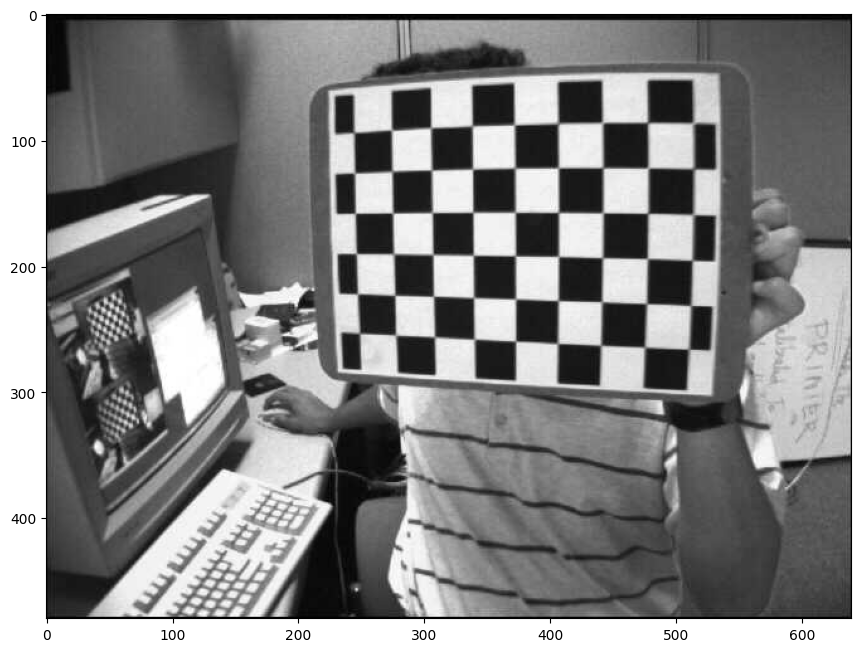

In [8]:
plt.imshow(imgboard1)

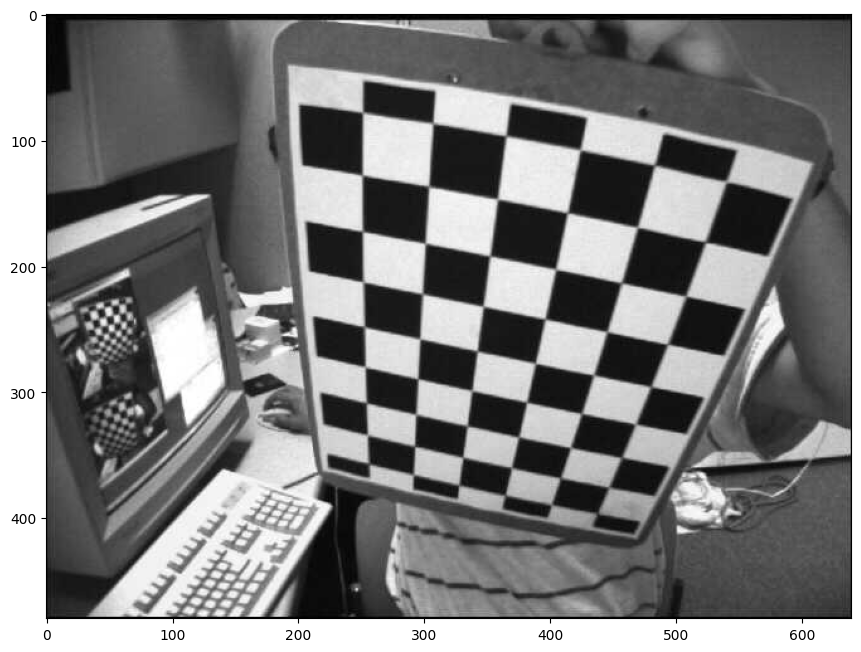

In [9]:
imgboard2= cv2.imread(pathMain + files[1])
plt.imshow(imgboard2)

## Calibration


In [10]:
# calibration
# find the corners in the board
def get_chessboard(frame, columns, rows):
    """
    Take a picture with a chessboard visible in both captures.

    ``columns`` and ``rows`` should be the number of inside corners in the
    chessboard's columns and rows. ``show`` determines whether the frames
    are shown while the cameras search for a chessboard.
    """


    found_corners = cv2.findChessboardCorners(frame, (columns, rows),
                                                           flags=cv2.CALIB_CB_FAST_CHECK)
    return  found_corners

*3D Scene Points:
     Initialize the chessboard corners 
     in the chessboard reference frame
   The corners are at 3D location (X,Y,Z)= (i,j,0)* 

In [11]:
height = 9
width  = 6
board_size = [height,width]

# the points on the chessboard
imageCorners = np.array([])

objectCorners = np.zeros((width*height,3), np.float32)
objectCorners[:,:2] = np.mgrid[0:height,0:width].T.reshape(-1,2)
AllCorner=[]
objpoints = [] # 3d point in real world space

In [12]:
def showImageWithCorners(img,cornerToShow):
  plt.plot(cornerToShow[:,0], cornerToShow[:,1], marker='o', color="red")
  plt.imshow(img)

**Run in all board images and collect all corners found**

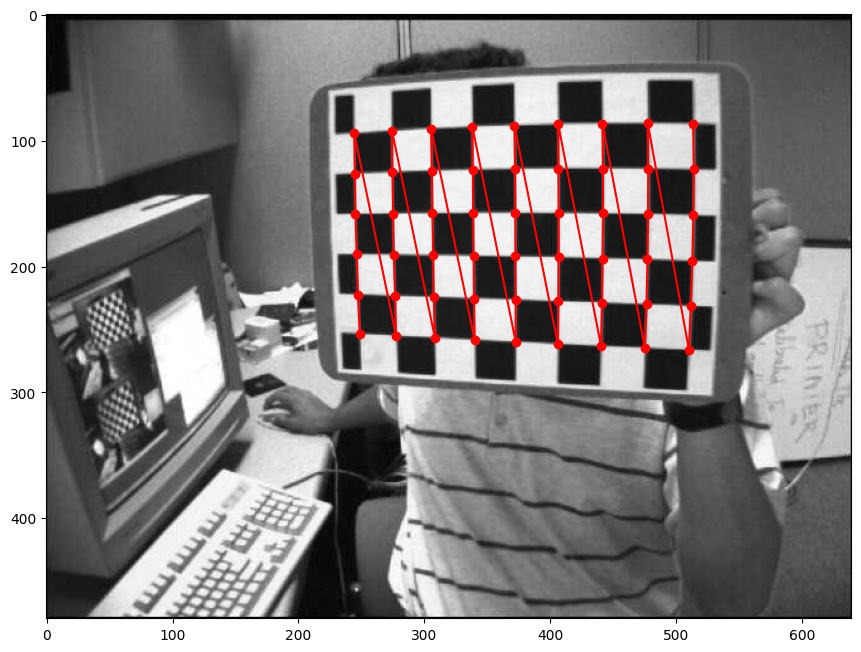

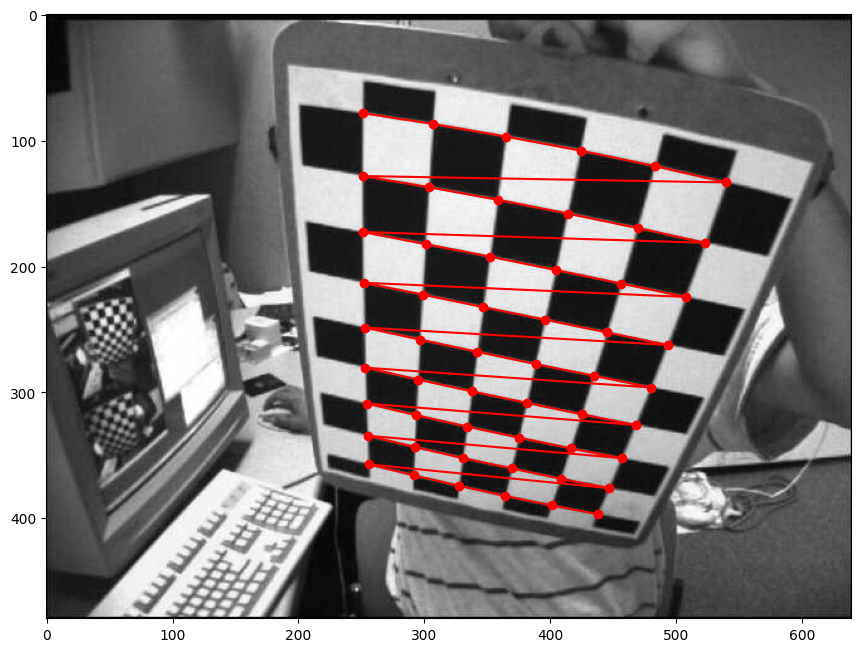

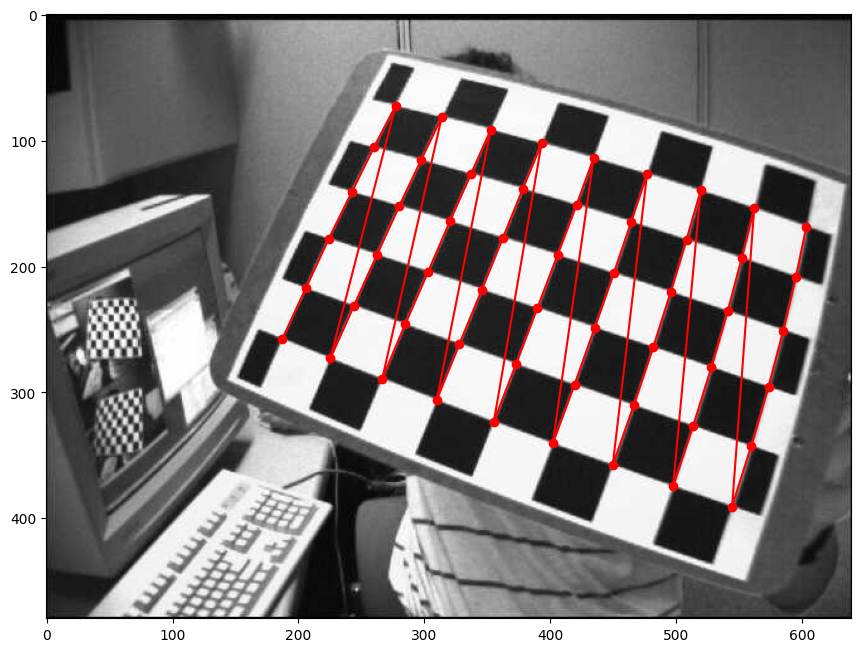

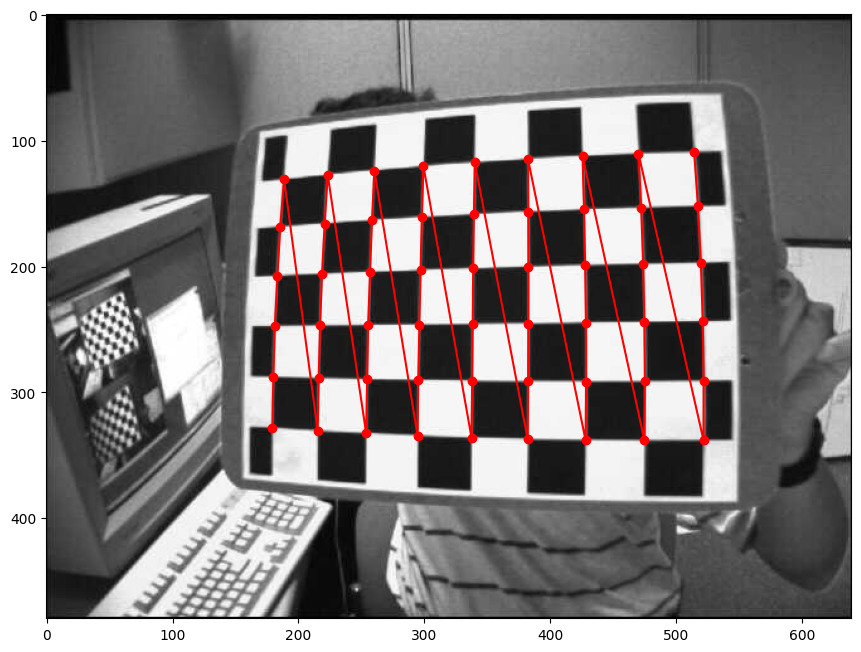

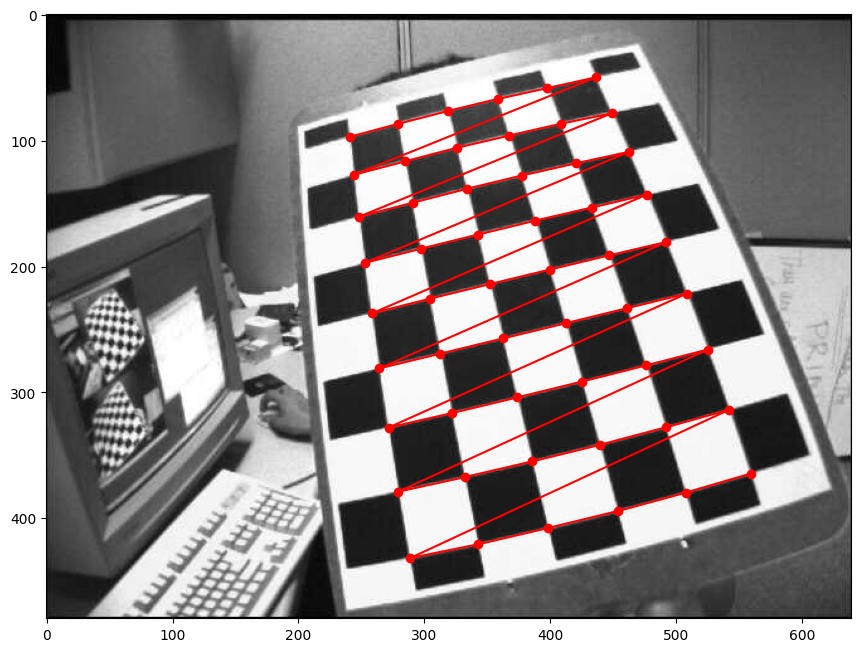

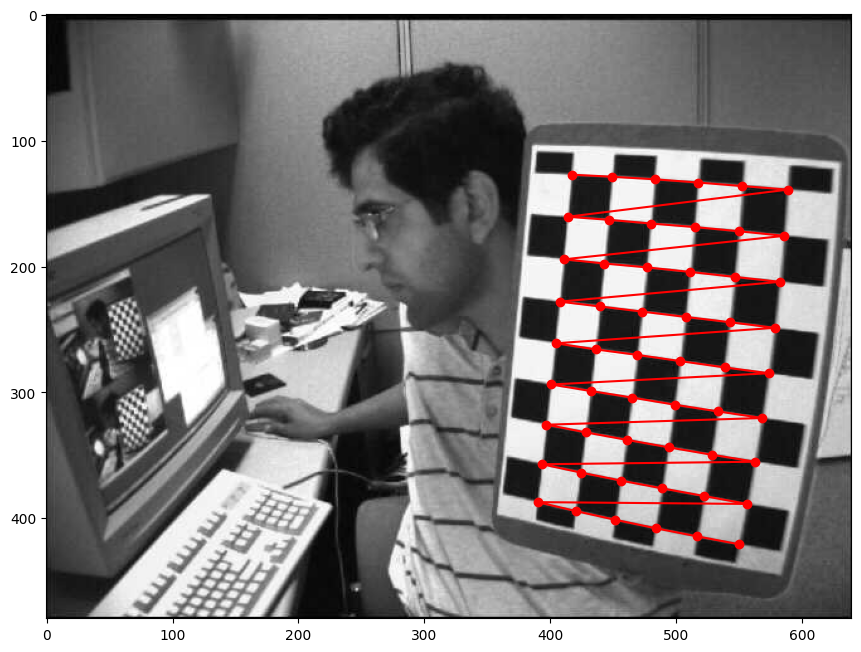

In [13]:
for f in  files:
    pathBoard = os.path.join(pathMain,f)
    imgBoard = cv2.imread(pathBoard)
    src_gray = cv2.cvtColor(imgBoard, cv2.COLOR_BGR2GRAY)
    found_corners = get_chessboard(src_gray, width, height)

    #cv2.drawChessboardCorners(imgBoard, board_size, found_corners, True)
    #plt.imshow("imgBoard", imgBoard)
    

    corners =np.squeeze(found_corners[1])

    # Set the needed parameters to find the refined corners
    winSize = (5, 5)
    zeroZone = (-1, -1)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_COUNT, 40, 0.001)

    # Calculate the refined corner locations
    corners = cv2.cornerSubPix(src_gray, corners, winSize, zeroZone, criteria)

    plt.figure()
    showImageWithCorners(imgBoard,corners)

    AllCorner.append(corners)

    objpoints.append(objectCorners)

In [14]:
print('corner stat')
print(len(AllCorner))
print(AllCorner[0].shape)


corner stat
6
(54, 2)


In [15]:
print('obj point stat')
len(objpoints)
print(objpoints[0].shape)

obj point stat
(54, 3)


# find calibration matrix

In [16]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, AllCorner, src_gray.shape[::-1], None, None)
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (width,height), 1, (width,height))

In [17]:
mtx

array([[ 7.96020433e+03,  0.00000000e+00, -2.24713936e+02],
       [ 0.00000000e+00,  1.41568602e+03,  2.39459908e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [18]:
newcameramtx

array([[4.25065625e+03, 0.00000000e+00, 2.00486188e+01],
       [0.00000000e+00, 2.40784485e+02, 1.42564104e+01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# Matching

In [19]:
pathTeddyLR ='/content/drive/MyDrive/CameraCalibration/stereo-pairs/teddy/'

In [20]:
image1 = cv2.imread(pathTeddyLR + "imR.png")
image2 = cv2.imread(pathTeddyLR + "imL.png")

gray1= cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
gray2= cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

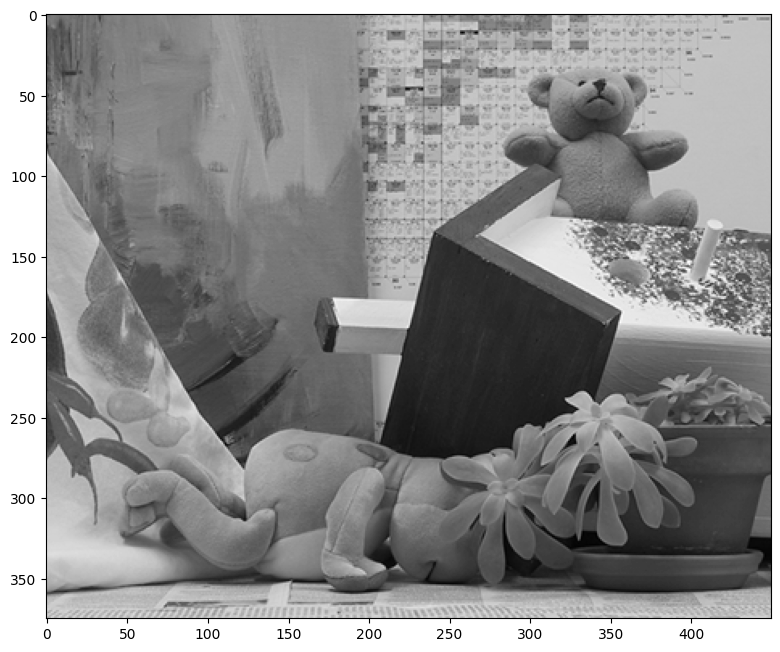

In [21]:

plt.imshow(gray1,cmap='gray')

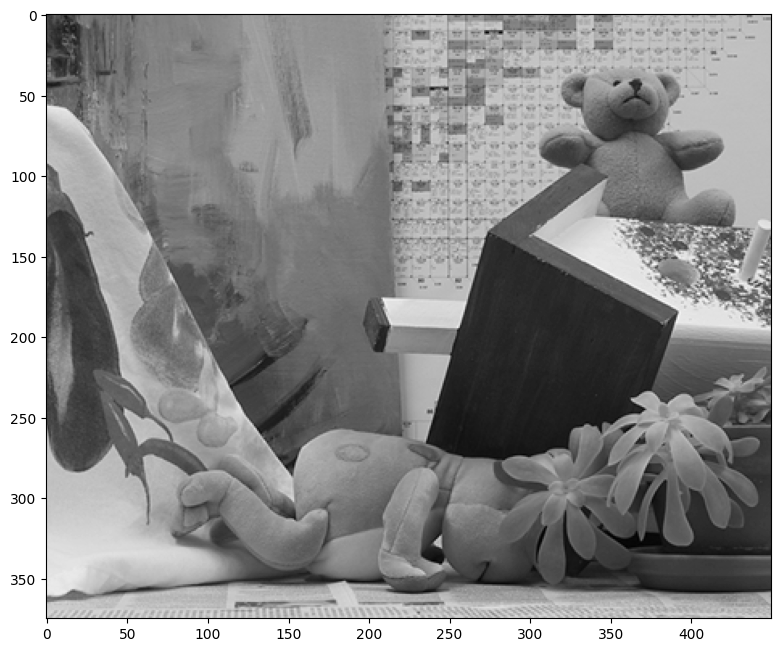

In [22]:
plt.imshow(gray2,cmap='gray')

### Initiate ORB detector

In [23]:

orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, desc1 = orb.detectAndCompute(gray1,None)
kp2, desc2 = orb.detectAndCompute(gray2,None)

#####match
##### create BFMatcher object

In [24]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(desc1,desc2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

In [25]:
# Draw first 10 matches.
img3 = cv2.drawMatches(image1,kp1,image2,kp2,matches[:30],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

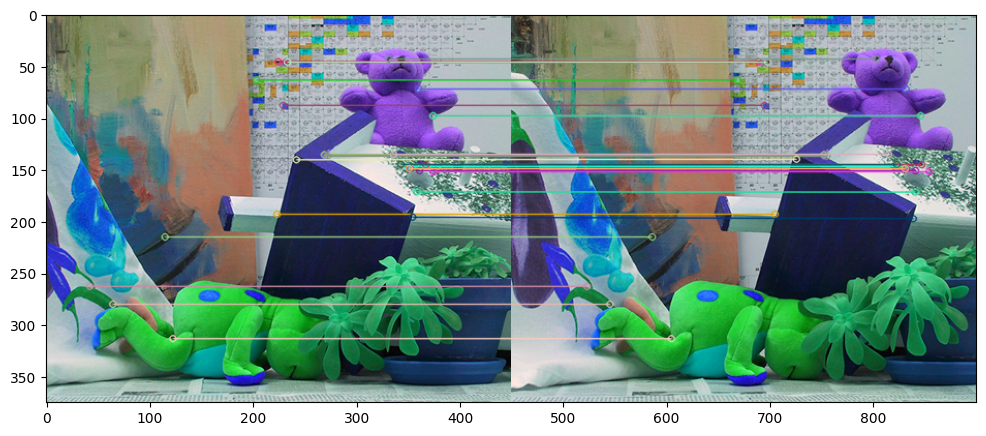

In [26]:
plt.imshow(img3)

#### Convert keypoints into Point2f

In [27]:
points1 = np.array([])
points2 = np.array([])

for mt in matches:
    query = mt.queryIdx
    points1 = np.append(points1,np.array(kp1[query].pt))
    trainidx = mt.trainIdx
    points2 = np.append(points2,np.array(kp2[trainidx].pt))


p1Arr = np.reshape(points1,(int(points1.shape[0]/2),2))
p2Arr = np.reshape(points2,(int(points2.shape[0]/2),2))

### Matching

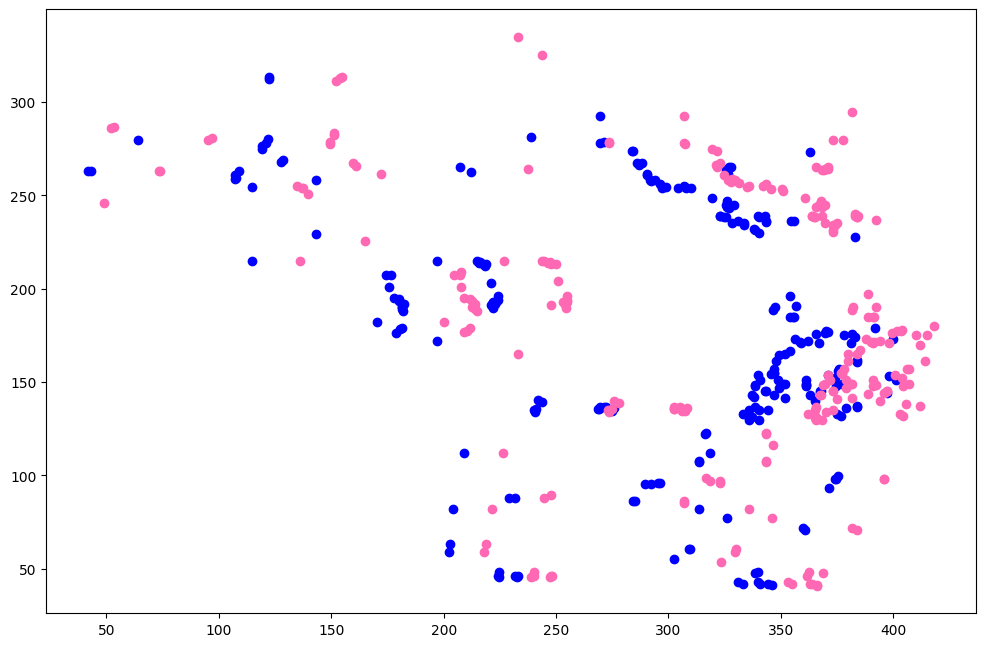

In [28]:
plt.figure()
plt.scatter(p1Arr[:,0],p1Arr[:,1],color = 'blue')
plt.scatter(p2Arr[:,0],p2Arr[:,1],color = 'hotpink')


### KeyPoints

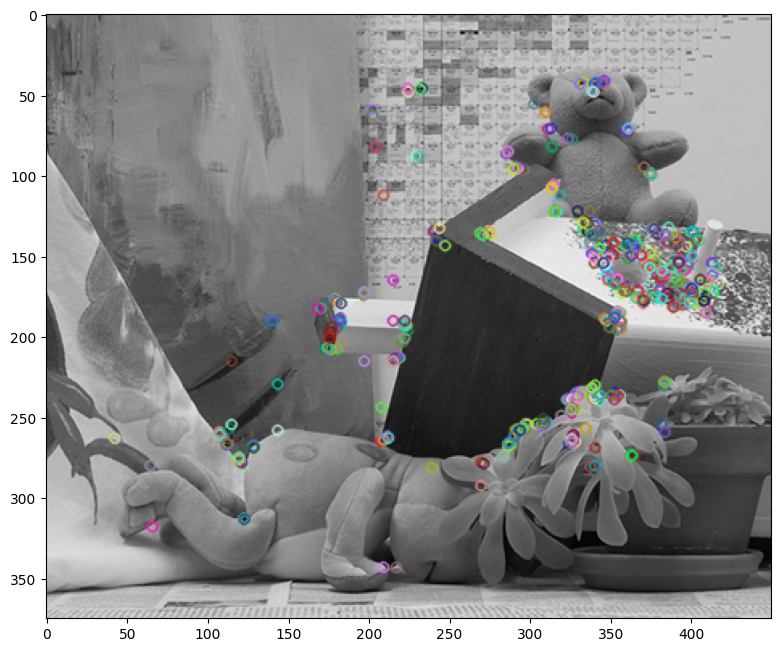

In [29]:
imgTmp = np.copy(image1)
img1 = cv2.drawKeypoints(gray1, kp1, imgTmp)
plt.imshow(img1)

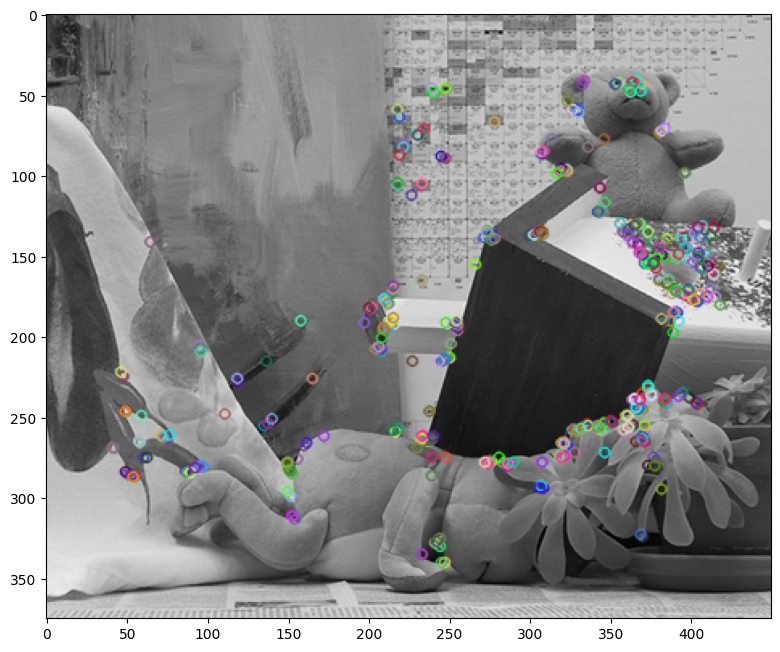

In [30]:
imgTmp = np.copy(image2)
img2 = cv2.drawKeypoints(gray2, kp2, imgTmp)
plt.imshow(img2)

### Find the essential between image1 and image2

https://en.wikipedia.org/wiki/Essential_matrix

https://en.wikipedia.org/wiki/Fundamental_matrix_(computer_vision)

In [31]:
essential = cv2.findEssentialMat(p1Arr, p2Arr, mtx, cv2.RANSAC, 0.9, 1.0)
print('essential done')
print(essential[0])

essential done
[[ 5.31095326e-06  1.64766243e-02  2.50129541e-03]
 [-1.88666860e-02 -1.51648866e-05 -7.06850614e-01]
 [-2.63659909e-03  7.06909874e-01 -3.10362034e-06]]


# Find Fundamental Matrix

https://docs.opencv.org/4.x/da/de9/tutorial_py_epipolar_geometry.html

In [32]:
pts1 = np.int32(p1Arr)
pts2 = np.int32(p2Arr)
F, mask = cv2.findFundamentalMat(pts1,pts2, cv2.FM_8POINT )#  cv2.FM_LMEDS)

In [33]:
print('found fundamental matrix xFxo=0')
print(F)

found fundamental matrix xFxo=0
[[ 6.84551293e-06  8.76547821e-06 -6.04772870e-03]
 [ 1.98115853e-06  7.45659324e-07 -5.18025020e-03]
 [ 7.56281293e-04  1.83951082e-03  1.00000000e+00]]


In [34]:
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

Next we find the epilines. Epilines corresponding to the points in first image is drawn on second image. So mentioning of correct images are important here. We get an array of lines. So we define a new function to draw these lines on the images. 

In [35]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    #r,c = img1.shape
    c=img1.shape[1]
    #img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    #img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    img1c=img1.copy()
    img2c=img2.copy()
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1c = cv2.line(img1c, (x0,y0), (x1,y1), color,1)
        img1c = cv2.circle(img1c,tuple(pt1),5,color,-1)
        img2c = cv2.circle(img2c,tuple(pt2),5,color,-1)
    return img1c,img2c

Now we find the epilines in both the images and draw them. 

In [36]:
image1.shape

(375, 450, 3)

In [37]:
gray1.shape

(375, 450)

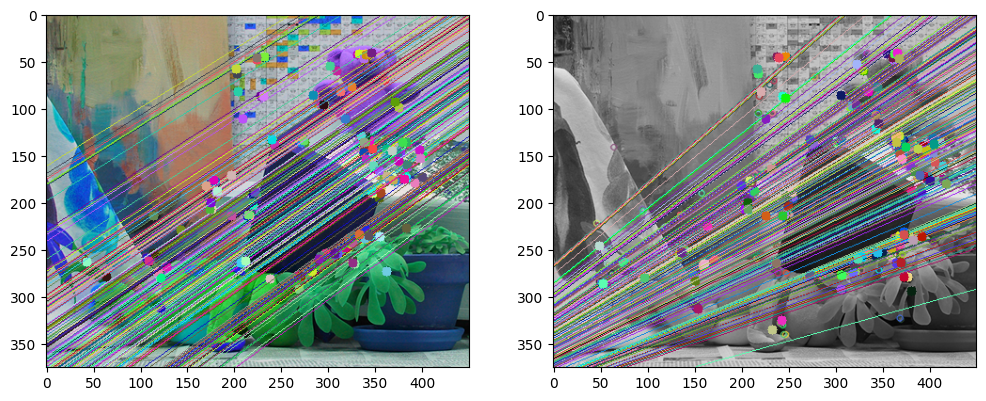

In [38]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(image1,image2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

### Compute homographic rectification


https://python.hotexamples.com/examples/cv2/-/stereoRectifyUncalibrated/python-stereorectifyuncalibrated-function-examples.html

In [39]:
imsize=gray1.shape
imsize

(375, 450)

In [40]:
gray2.shape

(375, 450)

In [41]:
   _, H1, H2 = cv2.stereoRectifyUncalibrated(pts1,
                                              pts2,
                                              F, imsize)

In [42]:
H1

array([[ 1.81924858e-03, -2.78566076e-03,  1.54567169e+00],
       [ 1.41197637e-03,  2.68028309e-03,  4.22968552e-01],
       [-5.57243428e-06, -5.48672521e-06,  8.08003177e-03]])

In [43]:
H2

array([[ 1.17549298e+00, -6.99418440e-01,  1.24376470e+02],
       [ 8.89656224e-01,  6.34280307e-01, -8.49684393e+01],
       [ 1.68143730e-03, -1.00045536e-03,  9.08992245e-01]])

#### Rectify the images through warping

https://theailearner.com/tag/cv2-warpperspective/

In [44]:

rectified1 = cv2.warpPerspective(gray1 , H1,imsize,flags=cv2.INTER_LINEAR);
#cv::Mat rectified2;
#cv::warpPerspective(img2, rectified2, h2, img1.size());

In [45]:
rectified1.shape

(450, 375)

In [46]:
rectified2 = cv2.warpPerspective(gray2 , H2,imsize,flags=cv2.INTER_LINEAR);

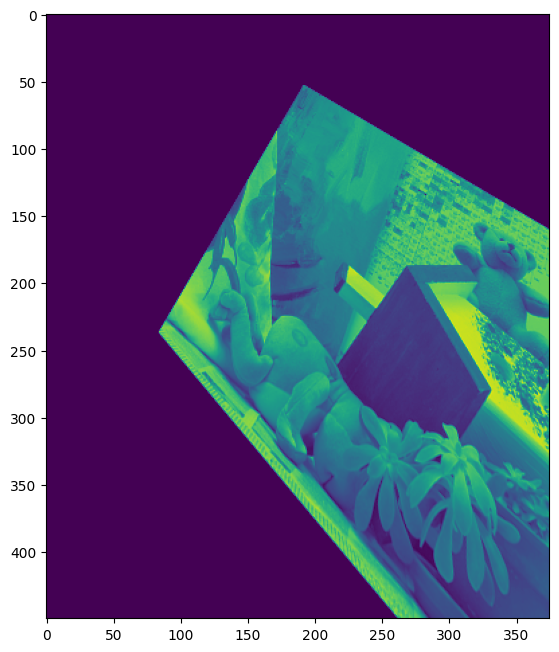

In [52]:
plt.imshow(rectified1)

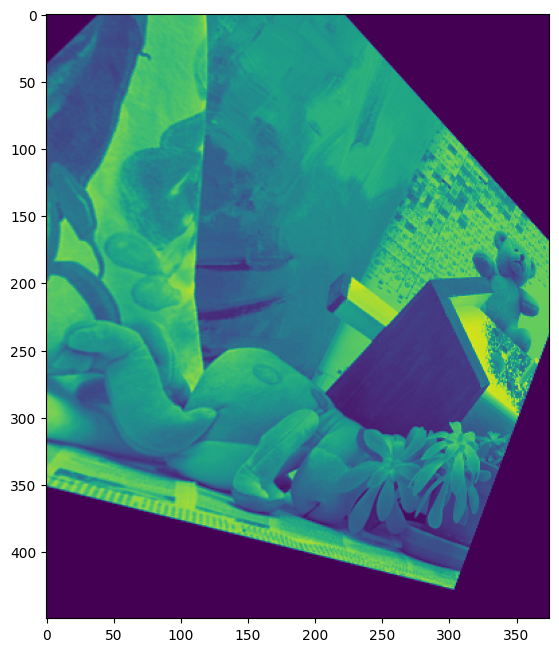

In [53]:
plt.imshow(rectified2)

# Compute disparity
cv::Mat disparity;
cv::Ptr<cv::StereoMatcher> pStereo = cv::StereoSGBM::creat(0,32,5);pStereo->compute(rectified1, rectified2, disparity);
cv::imwrite("disparity.jpg", disparity);

https://docs.opencv.org/4.x/dd/d53/tutorial_py_depthmap.html

In [48]:
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(rectified1,rectified2)

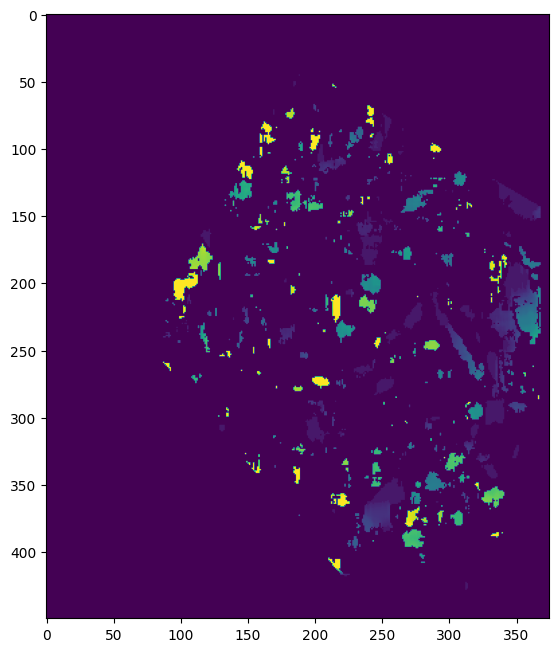

In [49]:
plt.imshow(disparity)

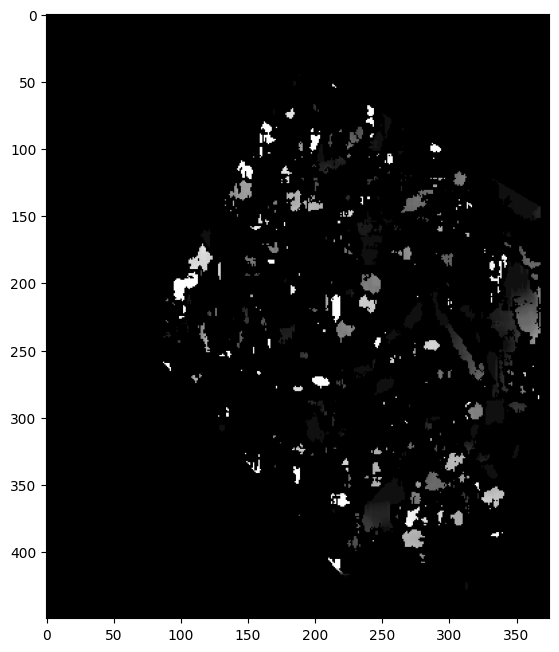

In [51]:
plt.imshow(disparity,cmap='gray')


In [55]:
'''
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(gray1,gray2)
plt.imshow(disparity,cmap='gray')
'''

"\nstereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)\ndisparity = stereo.compute(gray1,gray2)\nplt.imshow(disparity,cmap='gray')\n"

# Essential Matrix
